In [1]:
import sys
sys.path.append('..')

import os

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

# from src.analysis import plot_categoric_attribute, plot_discrete_attribute
# from src.helpers import get_numeric_columns

ModuleNotFoundError: No module named 'src'

In [3]:
%run 1st_Functions.ipynb

In [5]:
# Connect to DB
conn, cursor= connect()

import pandas
# sql = """ SELECT * from players where field_position in ('GK') """
sql = f"SELECT * from players"

data = pandas.read_sql(sql, con=conn)
# conn.commit()

# Disconnect from DB
disconnect(conn, cursor)

# data = create_players_dataframes(data, columns_to_keep)
# display(goal_keepers_data)
# goal_keepers_data = create_fifa_players_dataset(goal_keepers_data, './resources/', 'goal_keepers.csv')

<connection object at 0x000002305331E480; dsn: 'user=postgres password=xxx dbname=fifa-players-prediction host=fifa-players-prediction.cbbrjkjz8akw.us-east-2.rds.amazonaws.com port=5432', closed: 0>
Connected!


In [6]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

print("Number of numberic attributes - " + str(len(data.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns)))
print("Number of categorical attributes - " + str(len(data.select_dtypes(include=['object']).columns)))

Number of numberic attributes - 2
Number of categorical attributes - 86


In [7]:
len(['LS',
 'ST',
 'RS',
 'LW',
 'LF',
 'CF',
 'RF',
 'RW',
 'LAM',
 'CAM',
 'RAM',
 'LM',
 'LCM',
 'CM',
 'RCM',
 'RM',
 'LWB',
 'LDM',
 'CDM',
 'RDM',
 'RWB',
 'LB',
 'LCB',
 'CB',
 'RCB',
 'RB',])

26

In [8]:
print(f'in the dataset there are {len(data.columns)} columns and {len(data)} rows')

in the dataset there are 88 columns and 18207 rows


In [9]:

# https://github.com/ResidentMario/missingno
!pip install missingno

import missingno as msno

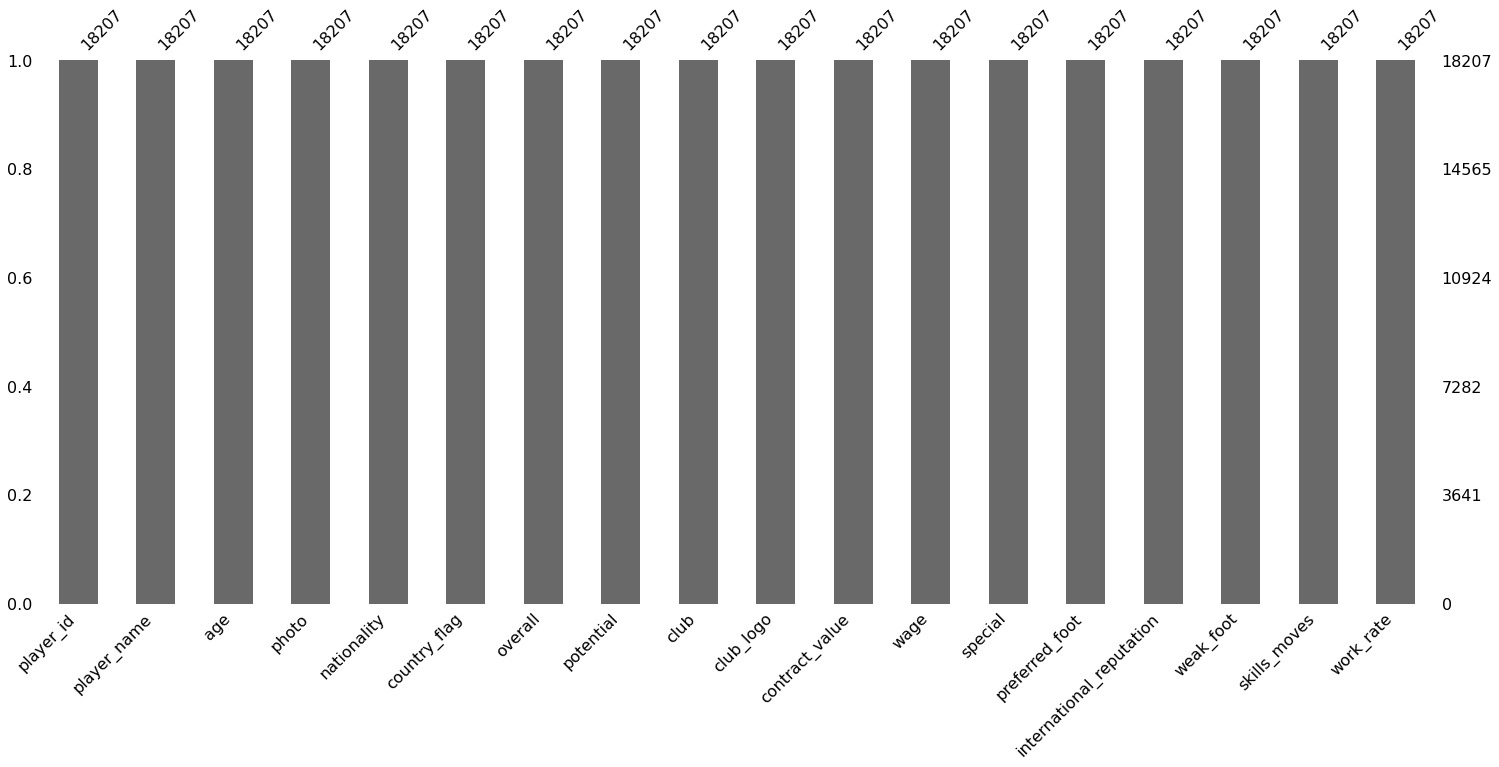

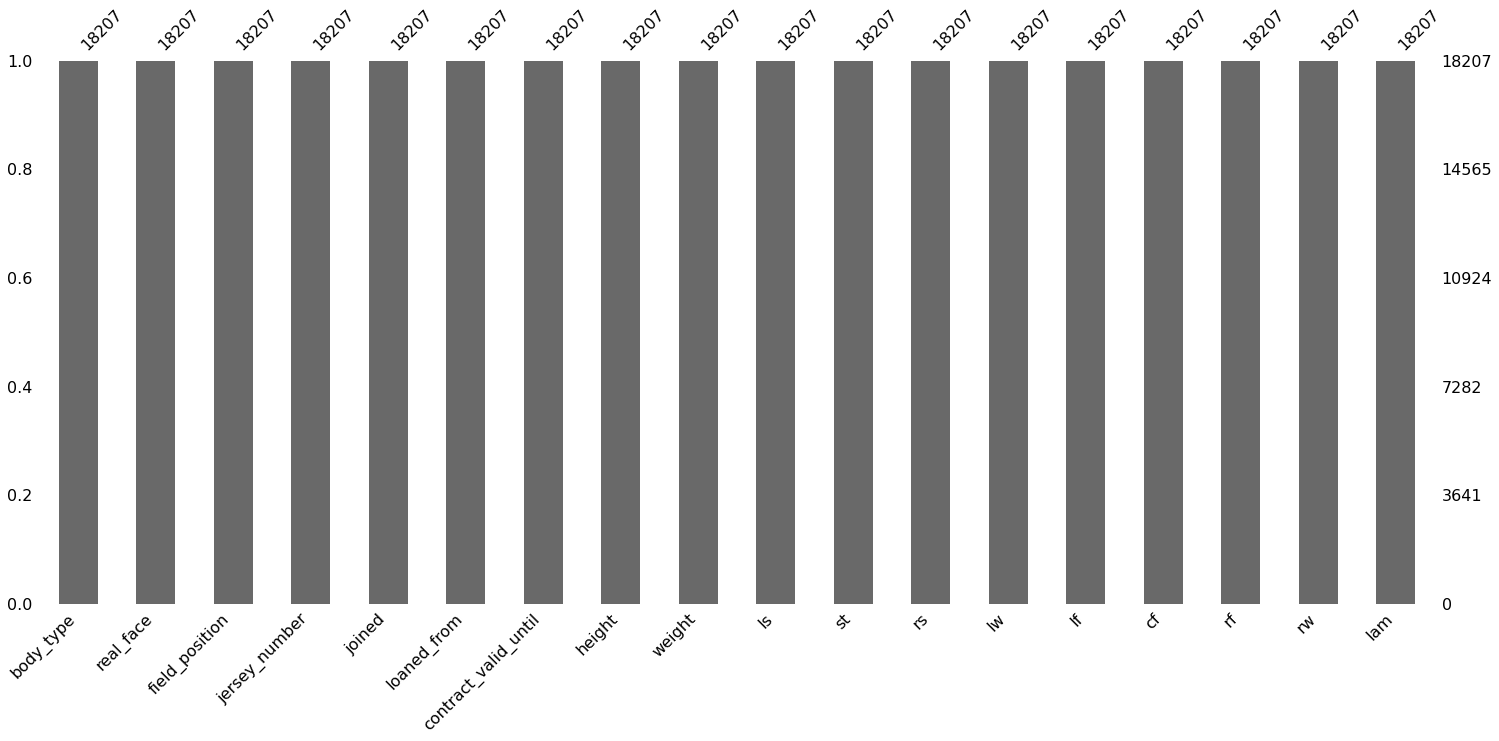

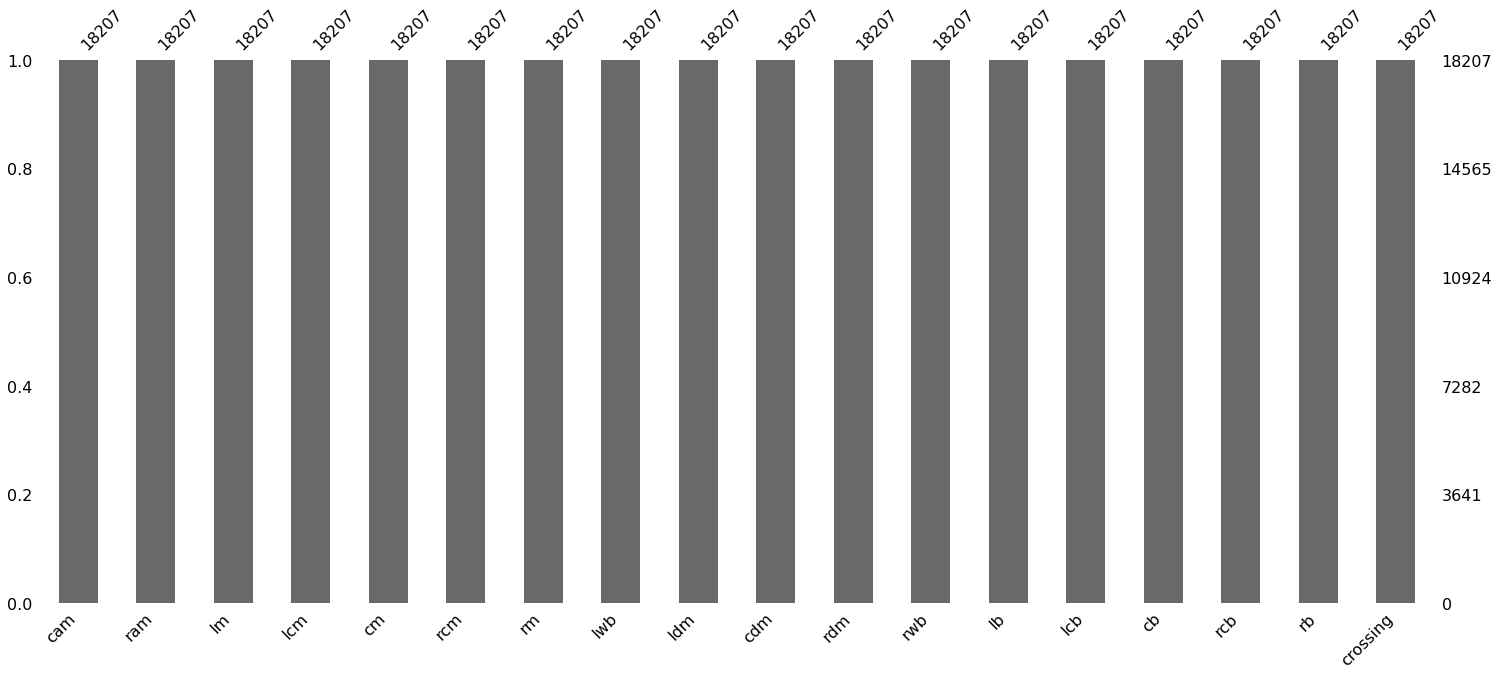

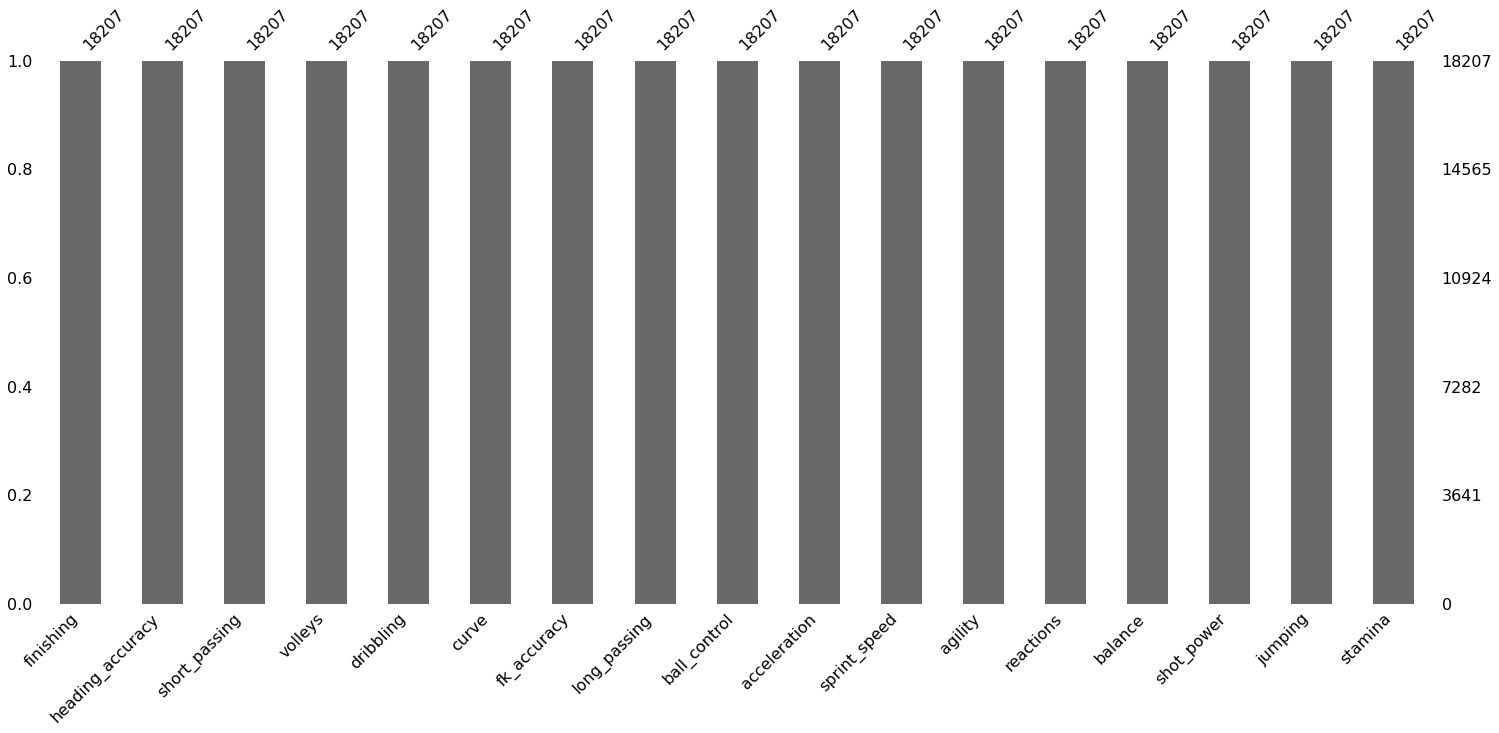

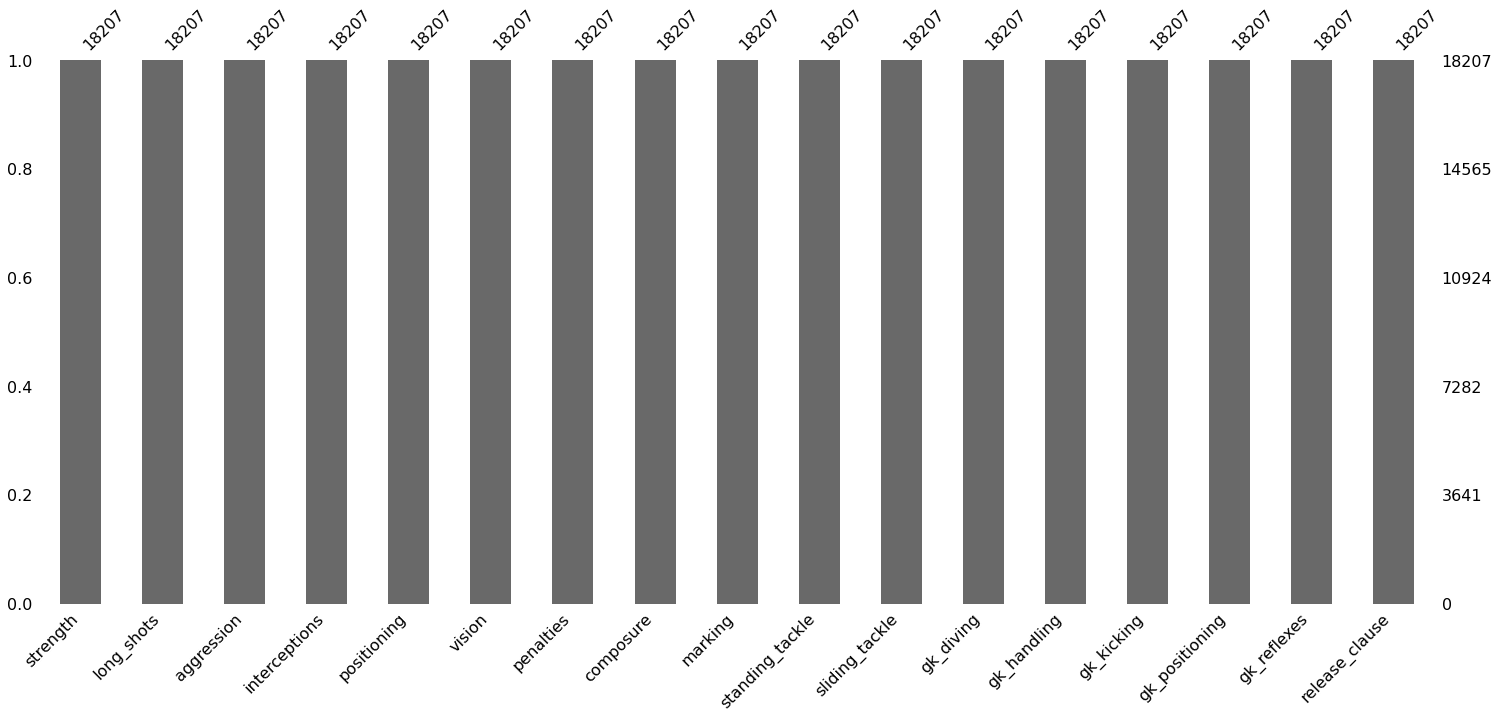

In [11]:
plot_count = 5
column_groups = np.array_split(data.columns, plot_count)

for columns in column_groups:
    msno.bar(data[columns])
    plt.show()

In [19]:
specific_positions = ('LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RW', 'LAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'RDM', 'LB', 'LCB', 'RCB', 'RB', 'RF','CAM','CDM','CB')

In [20]:
data_with_empty_positions = data[data[specific_positions].isnull().any(axis=1)]
len(data_with_empty_positions)

KeyError: ('LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RW', 'LAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'RDM', 'LB', 'LCB', 'RCB', 'RB', 'RF', 'CAM', 'CDM', 'CB')